In [1]:
import numpy as np
import random
import os
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
import gc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

import torch
import torch.nn as nn
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [2]:
BATCH_SIZE = 10

In [3]:
# data1 = pd.read_csv('./Sean/Sean_High_efficiency.csv', on_bad_lines='skip')
# data1['labels']= 1
# data1['subject']= 0

# data2 = pd.read_csv('./Sean/Sean_low_efficiency.csv', on_bad_lines='skip')
# data2['labels']= 2
# data2['subject']= 0

# data3 = pd.read_csv('./Sean/Sean_idle5.csv', on_bad_lines='skip')
# data3['labels']= 3
# data3['subject']= 0

# data4 = pd.read_csv('./Sean/Sean_leave.csv', on_bad_lines='skip')
# data4['labels']= 0
# data4['subject']= 0

In [4]:
# print(f"shape data1: {data1.shape}, data2: {data2.shape}, data3: {data3.shape}, data4: {data4.shape}")

In [5]:
# data_sean = pd.concat([data1,data2,data3, data4],axis = 0)
 
#reindex the data frame
# data_sean = data_sean.reset_index(drop=True)

In [6]:
# print(f"shape data sean: {data_sean.shape}")

In [7]:
# data_sean = data_sean.dropna(axis=0, how='any')

In [3]:
Subject_list = ['Sean', 'Iwan', 'Ericka']

In [5]:
#create function to read dataframe per subject
def read_data(subject:str, subject_id:int):
    print(f"subject: {subject}")
    data1 = pd.read_csv(f'./{subject}/{subject}_High_efficiency.csv')
    data1['labels']= 1
    data1['subject']= subject_id
    print(f"shape high efficiency: {data1.shape}")

    data2 = pd.read_csv(f'./{subject}/{subject}_low_efficiency.csv')
    data2['labels']= 2
    data2['subject']= subject_id
    print(f"shape low efficiency: {data2.shape}")

    data3 = pd.read_csv(f'./{subject}/{subject}_idle.csv')
    data3['labels']= 3
    data3['subject']= subject_id
    print(f"shape idle: {data3.shape}")

    data4 = pd.read_csv(f'./{subject}/{subject}_leave.csv')
    data4['labels']= 0
    data4['subject']= subject_id
    print(f"shape leave: {data4.shape}")

    combined_data = pd.concat([data1,data2,data3, data4],axis = 0)
    # combined_data = pd.concat([data1,data2,data3],axis = 0)


    #reindex the data frame
    combined_data = combined_data.reset_index(drop=True)

    #drop the nan values
    # combined_data = combined_data.dropna(axis=0, how='any')

    return combined_data

In [6]:
# data_sean = read_data('Sean', 0)

for idx, s in enumerate(Subject_list):
    if idx == 0:
        data = read_data(s, idx)
    else:
        data = pd.concat([data, read_data(s, idx)], axis=0)

subject: Sean
shape high efficiency: (4709, 129)
shape low efficiency: (4978, 129)
shape idle: (4992, 129)
shape leave: (1051, 129)
subject: Iwan
shape high efficiency: (4107, 129)
shape low efficiency: (4801, 129)
shape idle: (4997, 129)
shape leave: (400, 129)
subject: Ericka
shape high efficiency: (4361, 129)
shape low efficiency: (4857, 129)
shape idle: (4985, 129)
shape leave: (560, 129)


<Axes: xlabel='labels'>

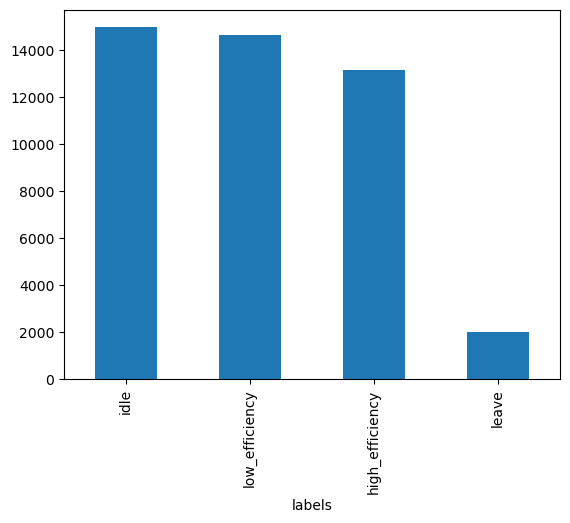

In [7]:
#plot the label distribution
data['labels'].value_counts().plot(kind='bar')

In [12]:
data.shape

(44798, 129)

In [13]:
v_c = data['subject'].value_counts()

In [14]:
data

,Left_Wrist_x,Left_Wrist_y,Left_Wrist_z,Left_Thumb_cmc_x,Left_Thumb_cmc_y,Left_Thumb_cmc_z,Left_Thumb_mcp_x,Left_Thumb_mcp_y,Left_Thumb_mcp_z,Left_Thumb_ip_x,...,Right_Pinky_pip_z,Right_Pinky_dip_x,Right_Pinky_dip_y,Right_Pinky_dip_z,Right_Pinky_tip_x,Right_Pinky_tip_y,Right_Pinky_tip_z,timestamp,labels,subject
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016243,0.017500,0.034174,0.022973,0.011659,0.043010,0.037317,1697456359547,1,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017017,0.017777,0.033955,0.024564,0.009328,0.043821,0.033610,1697456359611,1,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016705,0.017519,0.033622,0.024727,0.009225,0.044304,0.033634,1697456359674,1,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016876,0.018186,0.037069,0.025876,0.009091,0.046908,0.036123,1697456359735,1,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017031,0.017853,0.036873,0.026279,0.008968,0.046796,0.036157,1697456359799,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14758,-0.009492,-0.036066,0.049664,0.005198,-0.021331,0.036564,0.012074,-0.009636,0.025065,0.021246,...,0.013972,0.024174,0.026955,0.015900,0.026636,0.043442,0.015058,1698504588820,0,2
14759,-0.012480,-0.032121,0.054488,0.003574,-0.019749,0.040128,0.008409,-0.007742,0.025449,0.016559,...,0.014125,0.024041,0.027383,0.016801,0.027007,0.044602,0.014938,1698504588879,0,2
14760,-0.016219,-0.026776,0.071466,0.000675,-0.019148,0.045970,0.005976,-0.004677,0.030169,0.011702,...,0.017287,0.024187,0.035400,0.020531,0.024426,0.051877,0.023669,1698504588940,0,2
14761,-0.021735,-0.032966,0.068249,-0.002966,-0.035764,0.044798,0.010315,-0.020142,0.029688,0.023128,...,0.022613,0.013583,0.038127,0.028934,0.003610,0.049073,0.038692,1698504589038,0,2


In [15]:
SEGMENT_TIME_SIZE = 150
TIME_STEP = 30

In [16]:
X = []
Y = []

for idx, user_id in enumerate(sorted(v_c.index)):
    #data preprocessing
    data_convoluted = []
    labels = []
    user_data = data[data['subject'] == user_id]

    #slide the window with segment_time_size and time_step
    for i in range(0, len(user_data) - SEGMENT_TIME_SIZE, TIME_STEP):
        #get the data segment by segment_time_size for every column except labels, subject, and timestamp
        data_convoluted.append(user_data.iloc[i: i + SEGMENT_TIME_SIZE, :-3].values)
        # data_convoluted.append(user_data.iloc[i: i + SEGMENT_TIME_SIZE, 1:-2].values)
        #get the label of this window that appears most frequently
        labels_segment = user_data['labels'][i: i + SEGMENT_TIME_SIZE].values
        mode_label = int(np.bincount(labels_segment).argmax())
        labels.append(mode_label)

    #reshape the data to fit the input of CNN and convert it to numpy array
    reshaped_segments = np.asarray(data_convoluted, dtype= np.float32).reshape(-1, 126, 1, 150)
    #convert the label to numpy array
    labels = np.asarray(labels)

    shuffle_idx = np.random.choice(np.arange(labels.shape[0]), labels.shape[0], replace=False)
    reshaped_segments = reshaped_segments[shuffle_idx]
    labels = labels[shuffle_idx]

    print(f"shape reshaped_segments: {reshaped_segments.shape}, labels: {labels.shape}")
    X.append(reshaped_segments)
    Y.append(labels)


shape reshaped_segments: (520, 126, 1, 150), labels: (520,)
shape reshaped_segments: (472, 126, 1, 150), labels: (472,)
shape reshaped_segments: (488, 126, 1, 150), labels: (488,)


In [17]:
len(Y)

3

In [18]:
len(X)

3

In [19]:
statistic = []
num_clients = len(Y)
num_classes = len(np.unique(np.concatenate(Y, axis=0)))
for i in range(num_clients):
    statistic.append([])
    for yy in sorted(np.unique(Y[i])):
        idx = Y[i] == yy
        statistic[-1].append((int(yy), int(len(X[i][idx]))))

for i in range(num_clients):
    print(f"Client {i}\t Size of data: {len(X[i])}\t Labels: ", np.unique(Y[i]))
    print(f"\t\t Samples of labels: ", [i for i in statistic[i]])
    print("-" * 50)

Client 0	 Size of data: 520	 Labels:  [0 1 2 3]
		 Samples of labels:  [(0, 33), (1, 155), (2, 166), (3, 166)]
--------------------------------------------------
Client 1	 Size of data: 472	 Labels:  [0 1 2 3]
		 Samples of labels:  [(0, 11), (1, 135), (2, 160), (3, 166)]
--------------------------------------------------
Client 2	 Size of data: 488	 Labels:  [0 1 2 3]
		 Samples of labels:  [(0, 17), (1, 143), (2, 162), (3, 166)]
--------------------------------------------------


In [20]:
Y[1]

array([3, 1, 1, 3, 3, 1, 2, 1, 3, 1, 2, 2, 3, 3, 2, 3, 2, 1, 1, 2, 3, 2,
       3, 3, 1, 2, 2, 3, 3, 2, 3, 2, 3, 1, 2, 3, 2, 3, 2, 1, 1, 1, 3, 3,
       1, 2, 2, 3, 3, 3, 1, 3, 2, 3, 3, 3, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2,
       2, 2, 2, 1, 3, 2, 1, 1, 1, 1, 1, 2, 3, 2, 3, 1, 1, 2, 3, 3, 3, 3,
       0, 3, 3, 1, 3, 1, 3, 2, 3, 3, 2, 0, 2, 3, 2, 2, 2, 3, 2, 3, 1, 2,
       3, 3, 1, 1, 2, 2, 0, 3, 3, 2, 3, 2, 2, 1, 1, 3, 1, 2, 2, 3, 3, 2,
       2, 1, 1, 3, 2, 2, 2, 3, 0, 2, 1, 1, 1, 1, 3, 3, 2, 1, 3, 1, 2, 1,
       2, 1, 1, 1, 3, 1, 2, 2, 2, 3, 3, 3, 1, 2, 2, 2, 3, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 2, 1, 3, 2, 2, 1, 2, 1, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 1, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3, 2, 1, 3, 3, 1, 3, 2, 3, 1, 1,
       1, 3, 2, 1, 0, 3, 2, 1, 3, 3, 2, 2, 3, 1, 2, 0, 1, 1, 2, 3, 1, 2,
       2, 1, 2, 1, 1, 3, 1, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 3, 3, 1, 3,
       3, 1, 3, 3, 2, 1, 1, 2, 2, 3, 3, 1, 1, 3, 2, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 3, 1, 2, 2, 1, 2, 1, 2, 3, 2, 3, 3, 3,

In [21]:
# combine all X into one array
X = np.concatenate(X, axis=0)

#combine all Y into one array
Y = np.concatenate(Y, axis=0).astype(np.int32)

#split the data into train and test with ratio 70:30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=420, stratify=Y)

#split the data into train and test with X[0] and X[1] as train and X[2] as test
# X_train = np.concatenate([X[0], X[1]], axis=0)
# X_test = X[2]
# Y_train = np.concatenate([Y[0], Y[1]], axis=0)
# Y_test = Y[2]


#convert X_train, X_test to tensor pytorch float32
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()

#convert Y_train, Y_test to tensor pytorch int64
Y_train = torch.from_numpy(Y_train).long()
Y_test = torch.from_numpy(Y_test).long()

#create DataLoader for train and test with BATCH_SIZE and shuffle=False
train_dataset = torch.utils.data.TensorDataset(X_train, Y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)

test_dataset = torch.utils.data.TensorDataset(X_test, Y_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

#check the number of dataloader for train and test
print(f"Number of train_loader: {len(train_loader)}, test_loader: {len(test_loader)}")



Number of train_loader: 104, test_loader: 45


In [22]:
class HARCNN(nn.Module):
  def __init__(self, in_channels=126, num_classes=4, conv_kernel_size=(1, 5), pool_kernel_size=(1, 2), dim=3008):
    super().__init__()
    self.conv1 = nn.Sequential(
        nn.Conv2d(in_channels, 32, kernel_size=conv_kernel_size),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=pool_kernel_size, stride=2)
    )
    self.conv2 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=conv_kernel_size),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=pool_kernel_size, stride=2)
    )
    self.fc1 = nn.Sequential(
        nn.Linear(dim, 64),
        nn.ReLU(inplace=True)
    )
    self.fc = nn.Linear(64, num_classes)

  def forward(self, x):
    out = self.conv1(x)
    out = self.conv2(out)
    out = torch.flatten(out, 1)
    out = self.fc1(out)
    out = self.fc(out)
    return out

In [23]:
import torch
import torch.nn as nn

class CNN_LSTM(nn.Module):
    def __init__(self, input_size, n_classes, cnn_out_channels=64, lstm_hidden_size=128, num_layers=2, dropout=0.5):
        super(CNN_LSTM, self).__init__()
        
        # 1D CNN layers
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=cnn_out_channels, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=cnn_out_channels, out_channels=cnn_out_channels, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        
        # LSTM layers
        # self.lstm = nn.LSTM(input_size=cnn_out_channels, hidden_size=lstm_hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout)
        self.lstm = nn.LSTM(input_size=cnn_out_channels, hidden_size=lstm_hidden_size, num_layers=num_layers, batch_first=True)
        
        # Fully connected layer
        self.fc = nn.Linear(in_features=lstm_hidden_size, out_features=n_classes)
    
    def forward(self, x):
        # Reshape input to 3D tensor of shape (batch_size, 126 x 3, 150)
        x = x.view(x.size(0), -1, x.size(-1))
        
        # Pass input through CNN layers
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        
        # Ensure the shape is (batch, seq_len, input_size)
        x = x.permute(0, 2, 1)
        
        # Pass through LSTM layers
        x, _ = self.lstm(x)
        
        # Use the last time-step for the fully connected layer
        x = x[:, -1, :]
        x = self.fc(x)
        
        return x

In [24]:
model = HARCNN(in_channels=126, num_classes=4, dim=2176)
# model = CNN_LSTM(input_size=126, n_classes=4)
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

model.to(device)

HARCNN(
  (conv1): Sequential(
    (0): Conv2d(126, 32, kernel_size=(1, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=(1, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(1, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=(1, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Sequential(
    (0): Linear(in_features=2176, out_features=64, bias=True)
    (1): ReLU(inplace=True)
  )
  (fc): Linear(in_features=64, out_features=4, bias=True)
)

In [25]:
train_losses = []
#perform training
def train(model, train_loader, optimizer, criterion, epoch):
    model.train()
    epoch_loss = 0  # Store cumulative loss for this epoch
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        epoch_loss += loss.item()  # Add the current batch loss
        loss.backward()
        optimizer.step()

        if batch_idx % 10 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\t Loss: {loss.item():.6f}")

    epoch_loss /= len(train_loader)
    train_losses.append(epoch_loss)

In [26]:
test_losses = []
#define test function
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(device)
            target = target.to(device)

            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            
            all_preds.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())

            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)

    print(f"Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({test_accuracy:.0f}%)")
    test_losses.append(test_loss)

    return np.array(all_preds).flatten(), np.array(all_targets).flatten()

In [27]:
#define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [28]:
train_losses = []
test_losses = []
#perform training and testing
for epoch in range(1, 31):
    train(model, train_loader, optimizer, criterion, epoch)
    test(model, test_loader)
    print("-" * 50)

Train Epoch: 1 [0/1036 (0%)]	 Loss: 1.409438
Train Epoch: 1 [100/1036 (10%)]	 Loss: 1.275160
Train Epoch: 1 [200/1036 (19%)]	 Loss: 1.053511
Train Epoch: 1 [300/1036 (29%)]	 Loss: 1.104588
Train Epoch: 1 [400/1036 (38%)]	 Loss: 1.331892
Train Epoch: 1 [500/1036 (48%)]	 Loss: 0.815827
Train Epoch: 1 [600/1036 (58%)]	 Loss: 0.946072
Train Epoch: 1 [700/1036 (67%)]	 Loss: 0.961208
Train Epoch: 1 [800/1036 (77%)]	 Loss: 0.862296
Train Epoch: 1 [900/1036 (87%)]	 Loss: 0.764668
Train Epoch: 1 [1000/1036 (96%)]	 Loss: 0.894888
Test set: Average loss: 0.6406, Accuracy: 311/444 (70%)
--------------------------------------------------
Train Epoch: 2 [0/1036 (0%)]	 Loss: 0.624067
Train Epoch: 2 [100/1036 (10%)]	 Loss: 0.917819
Train Epoch: 2 [200/1036 (19%)]	 Loss: 0.456712
Train Epoch: 2 [300/1036 (29%)]	 Loss: 0.526265
Train Epoch: 2 [400/1036 (38%)]	 Loss: 0.777455
Train Epoch: 2 [500/1036 (48%)]	 Loss: 0.336688
Train Epoch: 2 [600/1036 (58%)]	 Loss: 0.491774
Train Epoch: 2 [700/1036 (67%)]	 L

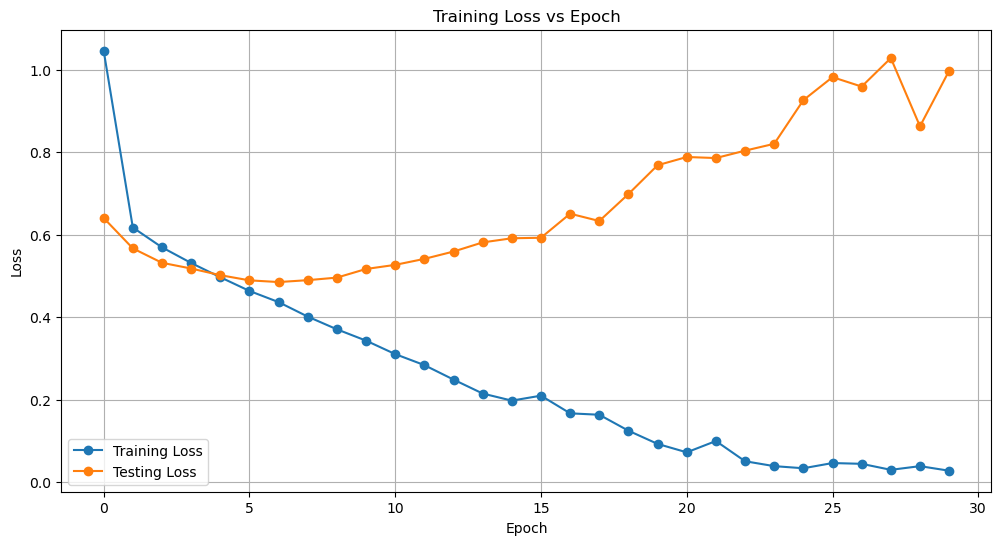

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_losses, '-o', label="Training Loss")
plt.plot(test_losses, '-o', label="Testing Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss vs Epoch")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, ax=ax, xticklabels=classes, yticklabels=classes)
    ax.set_ylabel('True labels')
    ax.set_xlabel('Predicted labels')
    ax.set_title('Confusion Matrix')
    plt.show()

Test set: Average loss: 0.9978, Accuracy: 365/444 (82%)


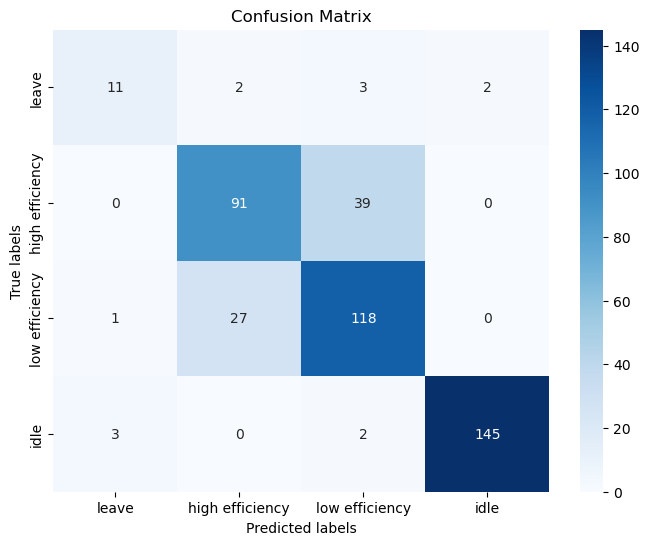

In [31]:
y_pred, y_true = test(model, test_loader)
plot_confusion_matrix(y_true, y_pred, classes=["leave", "high efficiency", "low efficiency", "idle"])
# plot_confusion_matrix(y_true, y_pred, classes=["high efficiency", "low efficiency", "idle"])